# Lab 13. AR 모델링 실습
---

In [1]:
import numpy as np 
import pandas as pd

- AR(1) 모델을 이용하여 시계열 데이터를 생성한다. 그리고 데이터 프레임을 생성하고 내용물을 확인해본다.

In [2]:
n = 100    # 데이터 포인트 수 
ar_params = [0.7]    # 자기회귀 계수 
ma_params = []    # 이동평균 계수 
residuals = np.random.normal(0, 1, n)    # 전차 생성 

# AR(1) 모델 생성 
data = [0]    # 초기값 설정 
for i in range(1, n) : 
    data.append(ar_params[0] * data[i-1] + residuals[i])

# 데이터 프레임 생성 
df = pd.DataFrame({
    'Date' : pd.date_range(start='2023-01-01', periods=n, freq='D'),
    'Value' : data
})

print(df)

         Date     Value
0  2023-01-01  0.000000
1  2023-01-02  0.633678
2  2023-01-03 -0.736289
3  2023-01-04 -0.919380
4  2023-01-05 -2.066826
..        ...       ...
95 2023-04-06  1.288643
96 2023-04-07  0.069879
97 2023-04-08 -0.129618
98 2023-04-09 -0.463382
99 2023-04-10 -0.873173

[100 rows x 2 columns]


In [3]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

- 모델을 핏해보고 모델 정보를 출력해본다.

In [4]:
# AR(1) 모델 적합 
model = AutoReg(df['Value'], lags=1)
results = model.fit()

# 모델 정보 출력 
print(results.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -143.712
Method:               Conditional MLE   S.D. of innovations              1.033
Date:                Tue, 20 Jun 2023   AIC                            293.424
Time:                        21:42:38   BIC                            301.209
Sample:                             1   HQIC                           296.574
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0768      0.106      0.723      0.470      -0.131       0.285
Value.L1       0.7364      0.068     10.761      0.000       0.602       0.870
                                    Roots           

- ACF 그래프를 출력해본다.

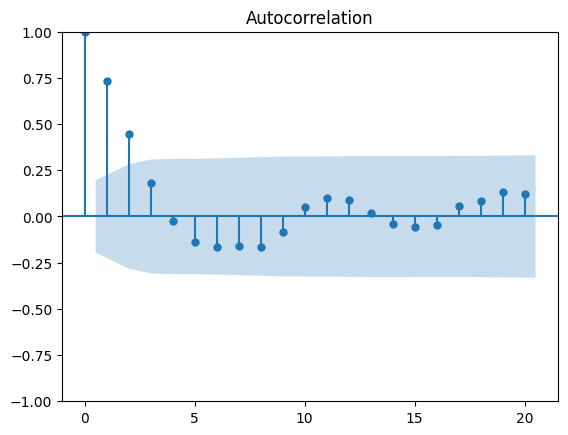

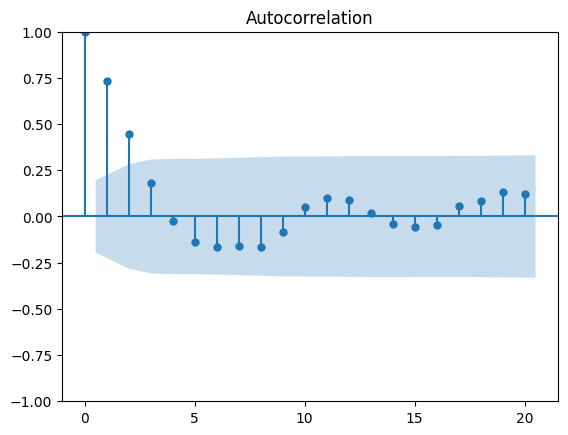

In [5]:
# ACF 그래프 출력 
plot_acf(df['Value'], lags=20)